# Racial Identity And Prenatal Care

### Video: https://youtu.be/O0YCBZ85wRg

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

## Overview

Our project examines the relationship between a mother’s racial identity and their access to adequate prenatal care. Through multiple data visualizations and significance tests, we found that a mother’s access to adequate prenatal care is significantly impacted by their racial identity. Additionally we found that mothers of marginalized racial groups, specifically Black and Hispanic mothers, are significantly more likely to deliver preterm. The project further investigates these discrepancies, shedding light on the systemic inequalities that exist within the American healthcare system. 

## Names

- Jake
- Sophie
- Jordan
- Ian
- Emma

<a id='research_question'></a>
## Research Question

Is there a correlation between a mother’s racial identity and the quality of care, evaluated using the Kotelchuck method, provided to their premature baby in New Jersey?

<a id='background'></a>

## Background & Prior Work

Previous research suggests that marginalized racial groups are at a higher risk for preterm labor. This inequality in preterm births has been reflected through analyses between White and non-White women through correlational studies examining the relationship between racial identity and other contributing factors to preterm births. In one particular study, Black women were reported as 2.5 times more likely to give birth prematurely [^De Oliveira]. This inequality has been shown to arise from a variety of systemic issues, many of which can be categorized by the quality of care mothers receive. Previous analyses of racial disparities in preterm labor in the United States visualize these differences through comparing births of White mothers with the births of non-White mothers. Additionally, analyses typically factor in potential contributors to the differences in preterm births (e.g. biological factors [^Behrman], stressors impacting pregnant mothers [^Kramer], socioeconomic status of mothers [^Gupta], and the availability of medical resources [^NJSHAD]). These works suggest that racial differences and discrimination in healthcare is at the forefront of this disparity. 
Our project will continue to examine the impact of racial identity on preterm labor. Our analysis will investigate whether a mother’s racial identity has more weight in predicting preterm births compared to a mother’s access to quality care during pregnancy. Further, we will examine whether these two factors interact with one another to predict preterm births. Our project aims to build off on existing research by compiling multiple variables in addition to racial identity in our data analysis. This will allow us to visualize the data from a wider perspective by taking into account the multitude of factors which are thought to contribute to preterm births. This work is crucial in order to improve health outcomes of newborns and mothers, specifically members of marginalized racial groups. By visualizing the plausible factors contributing to preterm births across racial groups, we can better address the inequality that exists within the healthcare system. 

[^Behrman]: Behrman RE, Butler AS, editors. Preterm Birth: Causes, Consequences, and Prevention. Washington (DC): National Academies Press (US); 2007. 6, Biological Pathways Leading to Preterm Birth. Available from: https://www.ncbi.nlm.nih.gov/books/NBK11353/

[^De Oliveira]: Oliveira, K. A., Araújo, E. M., Oliveira, K. A., Casotti, C. A., Silva, C. A. L. D., & Santos, D. B. D. (2018). Association between race/skin color and premature birth: a systematic review with meta-analysis. Revista de saude publica, 52, 26. https://doi.org/10.11606/S1518-8787.2018052000406

[^Gupta]: Gupta, Rahul MD, MPH, MBA, FACP; Froeb, Katherine MPH. Preterm Birth: Two Startling Trends, One Call to Action. The Journal of Perinatal & Neonatal Nursing 34(2):p 99-103, April/June 2020. https://doi.ord/10.1097/JPN.0000000000000469 

[^Kramer]: Michael R. Kramer, Carol R. Hogue, What Causes Racial Disparities in Very Preterm Birth? A Biosocial Perspective, Epidemiologic Reviews, Volume 31, Issue 1, 1 November 2009, Pages 84–98, https://doi.org/10.1093/ajerev/mxp003

[^NJSHAD]: Health, Department. “New Jersey State Health Assessment Data New Jersey's Public Health Data Resource.” NJSHAD - The Kotelchuck Index, https://www-doh.state.nj.us/doh-shad/query/Kotelchuck.html 

## Hypothesis


Non-White mothers will have a lower associated quality of care for their premature babies, as measured by the Kotelchuck method, an index used to determine the ratio between the expected medical attention and the observed medical attention of pregnant mothers (^NMIBS).

[^NBIBS]: Health, Department. “The Kotelchuck Index.” NM, https://ibis.doh.nm.gov/resource/Kotelchuck.html.

## Dataset

- Dataset Name: Preterm Births in New Jersey
- Link to the dataset: https://www.kaggle.com/datasets/natesutton/njpretermbirths
- Number of observations: 3,096,937

The New Jersey dataset consists of data from New Jersey expectant mothers according to a health assessment database. Its variables of interest are the age group of mothers, number of previous births, reported race and ethnicity, tobacco usage, access to adequate prenatal care, and a preterm indicator. If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import patsy
import statsmodels.api as sm
from itertools import combinations

## Data Cleaning

#### The dataset we used was found on Kaggle and was reverse-engineered by querying the New Jersey State Health Assessment Database by the authors of the data. The dataset including columns including age group of the mother, the mother’s reported race/ethnicity, whether the mother had given birth to previous children, whether or not the mother had used tobacco during pregnancy, if adequate prenatal care had been provided, and if the baby was born preterm (before 37 weeks, or after). 

#### Since the goal of our hypothesis was to identify how racial identity and quality of care affected preterm birth, we decided to drop the columns for previous births and tobacco usage, as our focus was on prenatal care for the current baby and not past babies born or other contributing factors to premature births. Dropping these columns and not considering them in our analysis may be leaving out potential relationships with preterm birth, but is an important consideration needed to validate any relationships found between our chosen variables and hypothesis. 

In [2]:
%%script false --no-raise-error
#Data cleaning from earlier drafts dropped previous births, tobacco use and took a smaller sample
#These parts could not be done here as the csv file was too large and these parts had to be trimmed in order to upload the csv to Git Hub
df = pd.read_csv('births.csv')
df = df.drop(['previous_births', 'tobacco_use_during_pregnancy'], axis=1)
df = df.sample(frac=.25).reset_index().drop('index', axis=1)
df.to_csv('births_cleaned.csv')

In [3]:
df = pd.read_csv('births_cleaned.csv')
df.head()

,Unnamed: 0,age_group,reported_race_ethnicity,adequate_prenatal_care,preterm_indicator
0,0,25 to 29 yrs,"Asian, non-Hispanic",Adequate,1
1,1,25 to 29 yrs,"White, non-Hispanic",Inadequate,0
2,2,20 to 24 yrs,"White, non-Hispanic",Inadequate,0
3,3,35 to 39 yrs,"White, non-Hispanic",Adequate,0
4,4,30 to 34 yrs,Hispanic (of any race),Adequate,0


In [4]:
# Drop unnecessary first column
df.drop('Unnamed: 0', axis = 1, inplace=True)

#### For the rest of the data cleaning process, we chose to rename the age, racial identity, and preterm indicator labels to make our variable names easier to understand and recognize in our visualizations. We also checked to make sure there were on empty (null) entries in our data before proceeding to descriptive analysis. 

In [5]:
# Simplify age_group
ages_dict = {
    'Under 15 yrs': '<15',
    '15 to 17 yrs': '15-17',
    '18 to 19 yrs': '18-19',
    '20 to 24 yrs': '20-24',
    '25 to 29 yrs': '25-29',
    '30 to 34 yrs': '30-34',
    '35 to 39 yrs': '35-39',
    '40 to 44 yrs': '40-44',
    '45 to 49 yrs': '45-49',
    '50+ yrs': '>50'
}

df['age_group'].replace(ages_dict, inplace=True)

In [6]:
# Simplify reported_race_ethnicity
races_dict = {
    'Asian, non-Hispanic': 'Asian',
    'White, non-Hispanic': 'White',
    'Black, non-Hispanic': 'Black',
    'Hispanic (of any race)': 'Hispanic'
}

df['reported_race_ethnicity'].replace(races_dict, inplace=True)

In [7]:
# Clarify preterm_indicator
preterm_dict = {
    0: 'Not Preterm',
    1: 'Preterm'
}

df['preterm_indicator'].replace(preterm_dict, inplace = True)

In [8]:
# Check for null values
df.isnull().mean()

age_group                  0.0
reported_race_ethnicity    0.0
adequate_prenatal_care     0.0
preterm_indicator          0.0
dtype: float64

In [9]:
# Cleaned dataset
df.head()

,age_group,reported_race_ethnicity,adequate_prenatal_care,preterm_indicator
0,25-29,Asian,Adequate,Preterm
1,25-29,White,Inadequate,Not Preterm
2,20-24,White,Inadequate,Not Preterm
3,35-39,White,Adequate,Not Preterm
4,30-34,Hispanic,Adequate,Not Preterm


## Data Analysis & Results

#### After data cleaning, we conducted descriptive analysis of our 4 remaining columns to get a broad understanding of our dataset and also plotted each categorical variable as visualizations using the seaborn package. There were 774234 rows of data each corresponding to an individual mother who gave birth to a child from 1990-2020. 

#### Our descriptive analysis of the data suggests that the dataset is consistent with national data and associations and predictive analysis discovered in the following steps are likely representative of the broader New Jersey population.

## Age group:

In [10]:
df['age_group'].describe()

count     774234
unique        10
top        30-34
freq      242040
Name: age_group, dtype: object

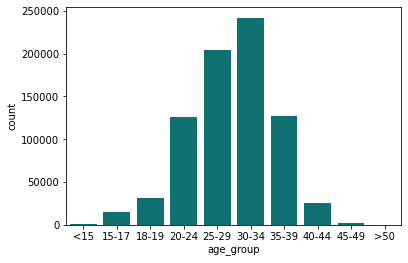

In [11]:
sns.countplot(data=df, x = 'age_group', order = ['<15', '15-17', '18-19', '20-24','25-29', '30-34', '35-39', '40-44', '45-49', '>50'], color = 'teal')
plt.show()

#### In the countplot of mother’s age groups, there are 10 age groups ranging from 0-50+ years old, and the shape of the countplot is approximately normally distributed centered around 30-34 years old. The countplot is also skewed right slightly as there are more mothers under the age of 30 than over the age of 34. This makes sense considering that after the age of 30, fertility starts to decline, according to the American College of Obstetricians and Gynecologists. [^ACOG]

[^ACOG]: “Having a Baby after Age 35: How Aging Affects Fertility and Pregnancy.” ACOG, www.acog.org/womens-health/faqs/having-a-baby-after-age-35-how-aging-affects-fertility-and-pregnancy#:~:text=A%20woman%27s%20peak%20reproductive%20years,getting%20pregnant%20naturally%20is%20unlikely. 

## Reported Race Ethnicity:

In [12]:
df['reported_race_ethnicity'].describe()

count     774234
unique         4
top        White
freq      405027
Name: reported_race_ethnicity, dtype: object

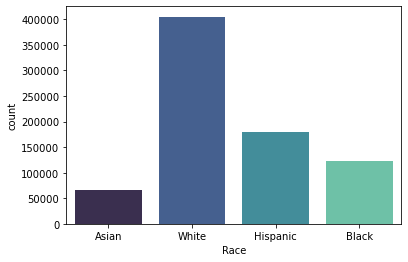

In [13]:
sns.countplot(data = df, x = 'reported_race_ethnicity', palette = 'mako').set(xlabel='Race')
plt.show()

#### In the countplot of racial identity of the mother, the largest racial identity population is White, followed by Hispanic, Black, and Asian. This data is representative of the New Jersey population; the 2022 U.S Census Bureau population estimate reported that 53.5% of residents were White, 21.5% were Hispanic or Latino, 15.3% were Back, and 10.3% were Asian [^U.S. Census Bureau].

[^U.S. Census Bureau]: U.S. Census Bureau. QuickFacts: New Jersey. U.S. Census Bureau. Retrieved from https://www.census.gov/quickfacts/NJ

## Adequate Care and Preterm Births:

In [14]:
df['adequate_prenatal_care'].describe()

count       774234
unique           2
top       Adequate
freq        527507
Name: adequate_prenatal_care, dtype: object

In [15]:
df['preterm_indicator'].describe()

count          774234
unique              2
top       Not Preterm
freq           702552
Name: preterm_indicator, dtype: object

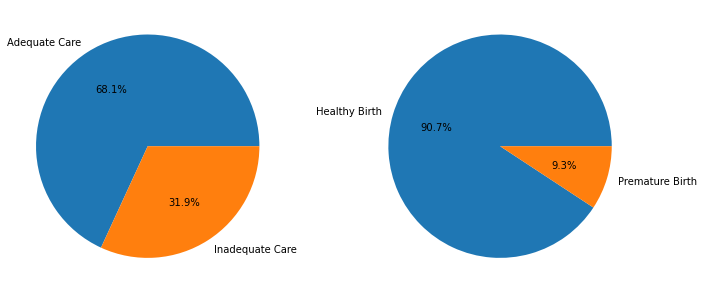

In [16]:
care = df.groupby('adequate_prenatal_care')['adequate_prenatal_care'].count()
preterm = df.groupby('preterm_indicator')['preterm_indicator'].count()

fig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].pie(care, labels=['Adequate Care', 'Inadequate Care'], autopct='%1.1f%%')
ax[1].pie(preterm, labels=['Healthy Birth', 'Premature Birth'], autopct='%1.1f%%')
fig.set_facecolor('white')
fig.tight_layout()
fig.show()

#### In our analysis of the preterm indicator and adequate care categorical variables, we decided to use a pie chart to give a better representation of the relative sizes between the categories. 31.9% of babies recorded received inadequate care and 9.3% of babies were born preterm. This is consistent with the national rate of preterm births, which in 2021 was 10.5% [^CDC]. 

[^CDC]: Centers for Disease Control and Prevention. Preterm Birth. Reproductive Health, Maternal and Infant Health. Retrieved from https://www.cdc.gov/reproductivehealth/maternalinfanthealth/pretermbirth.htm

#### In this barplot, we display adequacy of prenatal care grouped by the baby’s preterm status. It appears that there is a higher proportion of inadequate prenatal care among babies who were not born preterm. This would suggest that there are other contributing factors that might impact risk for preterm birth, as prenatal care is not a predictor of preterm labor.
 

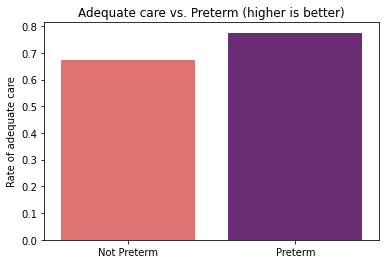

In [17]:
race_preterm = df.groupby(['preterm_indicator'])['adequate_prenatal_care'].value_counts(normalize=True).unstack()
race_preterm = race_preterm.reset_index().melt(id_vars='preterm_indicator', value_vars=['Adequate'])
sns.barplot(x='preterm_indicator', y='value', data=race_preterm, palette = 'magma_r').set(title='Adequate care vs. Preterm (higher is better)', xlabel='', ylabel='Rate of adequate care')
plt.show()

In [18]:
df_preterm_care = df[['adequate_prenatal_care', 'preterm_indicator']]
df_preterm_care['adequate_prenatal_care'].replace({'Adequate':1,'Inadequate':0}, inplace=True)
mean_preterm_care = df_preterm_care.groupby('preterm_indicator')['adequate_prenatal_care'].agg(['sum', 'count', 'mean']).sort_values('mean', ascending=False)
mean_preterm_care['mean']

preterm_indicator
Preterm        0.775202
Not Preterm    0.671750
Name: mean, dtype: float64

### Here, we run a binomial proportion test to examine the significance of the relationship between delivering preterm and receiving adequate prenatal care. Through this statistical test, we find that there is a significant relationship between these two variables(p<.05; d=0.10).

In [19]:
# results are given in pvalue, effectsize

counts = mean_preterm_care.loc[:,'sum']
nobs = mean_preterm_care.loc[:,'count']

sm.stats.test_proportions_2indep(counts['Preterm'], nobs['Preterm'], counts['Not Preterm'], nobs['Not Preterm'], alternative='larger').pvalue, sm.stats.effectsize_2proportions(counts['Preterm'], nobs['Preterm'], counts['Not Preterm'], nobs['Not Preterm'])[0]

(0.0, 0.10345202033215872)

#### Next, we created a barplot of preterm status, standardized to proportions, grouped by race in order to see general trends between the two variables. By just looking at the barplot, mothers who racially identify as Black and Hispanic appear to have higher rates of preterm birth than mothers who racially identify as White and Asian.

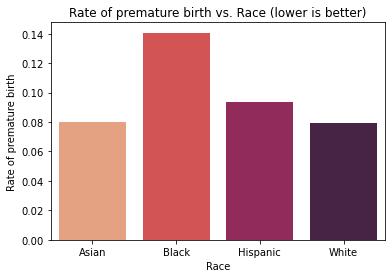

In [20]:
race_preterm_ind = df.groupby(['reported_race_ethnicity'])['preterm_indicator'].value_counts(normalize=True).unstack()
race_preterm_ind = race_preterm_ind.reset_index().melt(id_vars='reported_race_ethnicity', value_vars=['Preterm'])
sns.barplot(x='reported_race_ethnicity', y='value', data=race_preterm_ind, palette = 'rocket_r').set(title='Rate of premature birth vs. Race (lower is better)', xlabel='Race', ylabel='Rate of premature birth')
plt.show()

In [21]:
df_preterm = df[['reported_race_ethnicity', 'preterm_indicator']]
df_preterm['preterm_indicator'].replace({'Preterm':1,'Not Preterm':0}, inplace=True)
mean_preterm = df_preterm.groupby('reported_race_ethnicity')['preterm_indicator'].agg(['sum', 'count', 'mean']).sort_values('mean', ascending=False)
mean_preterm['mean']

reported_race_ethnicity
Black       0.140697
Hispanic    0.093918
Asian       0.080146
White       0.079434
Name: mean, dtype: float64

### Here, we conduct number of binomial proportion tests to examine the significance of the relationship between a mother’s racial identity and their risk or likelihood for delivering preterm. We see that Black mothers are significantly more likely to deliver preterm babies than White mothers (p<.05; d=0.061) and Hispanic mothers are also significantly more likely to deliver preterm babies than White mothers (p<.05; d=0.014).  

In [22]:
# results are given in pvalue, effectsize

counts = mean_preterm.loc[:,'sum']
nobs = mean_preterm.loc[:,'count']

results = dict()

for i,j in combinations(mean_preterm.index, 2):
    results[' '.join([i, '>', j])] = (sm.stats.test_proportions_2indep(counts[i], nobs[i], counts[j], nobs[j], alternative='larger'),
                                      sm.stats.effectsize_2proportions(counts[i], nobs[i], counts[j], nobs[j]))
    
{i:(j[0].pvalue, j[1][0]) for i,j in results.items()}

{'Black > Hispanic': (0.0, 0.04677892778470662),
 'Black > Asian': (0.0, 0.060550970996226555),
 'Black > White': (0.0, 0.061262726108460924),
 'Hispanic > Asian': (3.4312167478897737e-28, 0.013772043211519938),
 'Hispanic > White': (4.874531470616567e-72, 0.014483798323754307),
 'Asian > White': (0.2622284546798239, 0.000711755112234369)}

In [23]:
# Check multiple hypotheses using holm-sidak
sm.stats.multipletests([i[0].pvalue for i in results.values()])[0]

array([ True,  True,  True,  True,  True, False])

#### The following barplot displaying adequacy of care grouped by race shows a similar pattern, with women who identify as Black and Hispanic having lower rates of adequate prenatal care. 

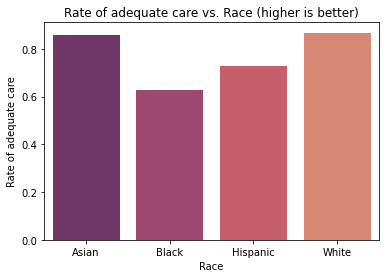

In [24]:
race_preterm_adq = df[df['preterm_indicator'] == 'Preterm'].groupby(['reported_race_ethnicity'])['adequate_prenatal_care'].value_counts(normalize=True).unstack()
race_preterm_adq = race_preterm_adq.reset_index().melt(id_vars='reported_race_ethnicity', value_vars=['Adequate'])
sns.barplot(x='reported_race_ethnicity', y='value', data=race_preterm_adq, palette = 'flare_r').set(title='Rate of adequate care vs. Race (higher is better)', xlabel='Race', ylabel='Rate of adequate care')
plt.show()

In [25]:
df_race_care = df.loc[df['preterm_indicator'] == 'Preterm'][['reported_race_ethnicity', 'adequate_prenatal_care']]
df_race_care['adequate_prenatal_care'].replace({'Adequate':1,'Inadequate':0}, inplace=True)
mean_race_preterm = df_race_care.groupby('reported_race_ethnicity')['adequate_prenatal_care'].agg(['sum', 'count', 'mean']).sort_values('mean', ascending=False)
mean_race_preterm['mean']

reported_race_ethnicity
White       0.867094
Asian       0.856286
Hispanic    0.726578
Black       0.626698
Name: mean, dtype: float64

### Here, we conduct a number of binomial to examine the significance of the relationship between a mother’s racial identity and the reported adequacy of their prenatal care. We see that Black mothers are significantly less likely to receive adequate prenatal care than White mothers (p<.05; d=0.24), Hispanic mothers are significantly less likely to receive adequate prenatal care than White mothers (p<.05; d=0.14), and Asian mothers are significantly less likely to receive adequate prenatal care than White mothers (p<.05; d=0.011).

In [26]:
# results are given in pvalue, effectsize

counts = mean_race_preterm.loc[:,'sum']
nobs = mean_race_preterm.loc[:,'count']

results = dict()

for i,j in combinations(mean_race_preterm.index, 2):
    results[' '.join([i, '>', j])] = (sm.stats.test_proportions_2indep(counts[i], nobs[i], counts[j], nobs[j], alternative='larger'),
                                      sm.stats.effectsize_2proportions(counts[i], nobs[i], counts[j], nobs[j]))
    
{i:(j[0].pvalue, j[1][0]) for i,j in results.items()}

{'White > Asian': (0.01721823163153085, 0.010807222460505694),
 'White > Hispanic': (6.1631360775233355e-282, 0.14051574784930088),
 'White > Black': (0.0, 0.24039525425053931),
 'Asian > Hispanic': (3.6892408834558495e-107, 0.12970852538879518),
 'Asian > Black': (0.0, 0.22958803179003362),
 'Hispanic > Black': (4.860811337371453e-88, 0.09987950640123844)}

In [27]:
# Check multiple hypotheses using holm-sidak
sm.stats.multipletests([i[0].pvalue for i in results.values()])[0]

array([ True,  True,  True,  True,  True,  True])

# Ethics & Privacy

- Privacy concerns: If data is collected from hospital records and patient surveys the data will contain sensitive information about the mothers and their babies. Including medical history, socioeconomic status, and demographic information. In order to address these issues the team would ensure all data removes names and other identifiers in order to protect the identity of the patients involved. Additionally, access to the data is strictly limited to a need to know basis.

- Bias and discrimination: Since this project is focused on identifying factors that contribute to premature births, the data set will include a very diverse range of mothers across the country. In order to avoid bias and discrimination the team can use statistical methods to control confounding variables, and make sure the data is collected from a representative sample of the population.

- Informed consent: In order to obtain informed consent the team should have given mothers clear and understandable information about the project, its purpose, and exactly how the data will be used.

- Potential unintended consequences: If the analysis reveals disparities in prenatal care and preterm birth rates based on race, there is a risk of perpetuating stereotypes or biases. Publishing data that suggests certain racial groups have higher rates of preterm births or inadequate prenatal care can lead to stigmatization. Results may be misinterpreted or sensationalized by media outlets or individuals. Research linking race to healthcare disparities can erode trust between patients and healthcare providers, especially for individuals from marginalized communities. 


# Conclusion & Discussion

We utilized various methods and visualizations throughout our analyses in order to examine the relationship between racial identity and reports of preterm labor. Our group originally hypothesized that non-White mothers would have less access to adequate prenatal care and an increased number of preterm births compared to White mothers. Throughout our visualizations, we observe this trend, thus supporting our hypothesis. Based on our analyses, we find that there is a difference between the access to adequate healthcare across different racial identities.

These findings hold significant implications for mothers of all racial identities and ethnicities. The disparities observed specifically between White and Black pregnant mothers demonstrate the systemic issues in the United States’ healthcare system. Our findings also align with previous research [^De Oliveira], further reinforcing the significance of our analyses. Additionally, our research builds off of previous findings and demonstrates that preterm births may not be influenced by a mother’s access to prenatal care, though a mother’s racial identity appears to influence access to prenatal care and their risk for delivering preterm. Further research on this issue might involve examining additional potential contributing factors to prenatal care and preterm births across a more equally distributed racial sample. This would allow medical systems to better address the disparities often observed within healthcare settings, thus leading to equitable prenatal care for all racial groups. 


# Team Contributions

Ian: Primary person in charge of coding, experimental design, helped with Ethics and Privacy section

Jake: Helped with data visualizations, analysis codes, and written descriptions for the codes, edited writing sections, helped film the final video

Jordan: Wrote descriptions for each code, edited writing sections

Sophie: Wrote abstract, background & prior work, and conclusion & discussion sections, helped with descriptions for the code, helped film the final video

Emma: Worked on Ethics and Privacy section, edited writing components, helped with the script and outline for the final video.